The dataset has 10 real attributes, and the last one is simply the class label, which is categorical, and which you will ignore for this assignment. Assume that attributes are numbered starting from 0.

- 1. Compute the multivariate mean vector

- 2. Compute the sample covariance matrix as inner products between the columns of the centered data matrix (see Eq. (2.38) in chapter 2).

- 3. Compute the sample covariance matrix as outer product between the centered data points (see Eq. (2.39) in chapter 2)

- 4. Compute the correlation between Attributes 1 and 2 by computing the cosine of the angle between the centered attribute vectors. Plot the scatter plot between these two attributes.

- 5. Assuming that Attribute 1 is normally distributed, plot its probability density function.

- 6. Which attribute has the largest variance, and which attribute has the smallest variance? Print these values.

- 7. Which pair of attributes has the largest covariance, and which pair of attributes has the smallest covariance? Print these values.

# Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/magic04.data', header=None)

In [3]:
df.columns = [
    'fLength',
    'fWidth',
    'fSize',
    'fConc',
    'fConc1',
    'fAsym',
    'fM3Long',
    'fM3Trans',
    'fAlpha',
    'fDist', 
    'class'
]

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df = df.iloc[:, :-1]
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
dtypes: float64(10)
memory usage: 1.5 MB


# Task 1

In [7]:
multi_mean = df.mean(axis=0)

In [8]:
multi_mean

fLength      53.250154
fWidth       22.180966
fSize         2.825017
fConc         0.380327
fConc1        0.214657
fAsym        -4.331745
fM3Long      10.545545
fM3Trans      0.249726
fAlpha       27.645707
fDist       193.818026
dtype: float64

# Task 2

In [9]:
n, d = df.shape

In [10]:
print(n, d)

19020 10


In [11]:
centered_df = df - multi_mean
centered_df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-24.453454,-6.178866,-0.180117,0.011473,-0.016457,32.032145,11.465455,-8.452426,12.446293,-111.935226
1,-21.646554,-10.457466,-0.306517,0.149973,0.162643,30.603945,13.278255,-10.207126,-21.284807,11.442974
2,108.801846,113.850034,1.236183,-0.342927,-0.195957,121.072745,-75.403545,-45.465726,49.314293,62.969974
3,-29.432954,-12.608166,-0.486517,0.234373,0.177543,31.542445,-17.008845,-7.401026,-17.196707,-77.081026
4,21.886046,8.739534,0.336083,-0.063527,-0.031457,-1.195955,18.006955,21.589574,-22.997707,162.643974


In [12]:
# Sample covariance matrix
s = centered_df.apply(lambda x: x @ centered_df) / n
s

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1794.686571,598.832056,14.063490,-4.886738,-2.800233,-924.385500,-258.713552,11.813387,-9.706307,1324.794475
fWidth,598.832056,336.560086,6.220775,-2.045029,-1.178164,-289.957100,-164.885064,15.185288,31.635030,461.761921
fSize,14.063490,6.220775,0.223338,-0.073507,-0.042241,-4.472843,2.293414,0.152113,-2.302804,15.434656
fConc,-4.886738,-2.045029,-0.073507,0.033419,0.019725,1.215131,-1.136468,-0.043000,1.122678,-4.485425
fConc1,-2.800233,-1.178164,-0.042241,0.019725,0.012212,0.655298,-0.669354,-0.025238,0.662872,-2.515662
fAsym,-924.385500,-289.957100,-4.472843,1.215131,0.655298,3505.173477,827.439241,3.147765,-86.061825,-914.642631
fM3Long,-258.713552,-164.885064,2.293414,-1.136468,-0.669354,827.439241,2600.875286,-18.265400,-247.972042,141.107736
fM3Trans,11.813387,15.185288,0.152113,-0.043000,-0.025238,3.147765,-18.265400,433.759406,2.532901,17.784263
fAlpha,-9.706307,31.635030,-2.302804,1.122678,0.662872,-86.061825,-247.972042,2.532901,681.363178,-430.230626
fDist,1324.794475,461.761921,15.434656,-4.485425,-2.515662,-914.642631,141.107736,17.784263,-430.230626,5584.546353


In [13]:
centered_df.T @ centered_df / n

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1794.686571,598.832056,14.063490,-4.886738,-2.800233,-924.385500,-258.713552,11.813387,-9.706307,1324.794475
fWidth,598.832056,336.560086,6.220775,-2.045029,-1.178164,-289.957100,-164.885064,15.185288,31.635030,461.761921
fSize,14.063490,6.220775,0.223338,-0.073507,-0.042241,-4.472843,2.293414,0.152113,-2.302804,15.434656
fConc,-4.886738,-2.045029,-0.073507,0.033419,0.019725,1.215131,-1.136468,-0.043000,1.122678,-4.485425
fConc1,-2.800233,-1.178164,-0.042241,0.019725,0.012212,0.655298,-0.669354,-0.025238,0.662872,-2.515662
fAsym,-924.385500,-289.957100,-4.472843,1.215131,0.655298,3505.173477,827.439241,3.147765,-86.061825,-914.642631
fM3Long,-258.713552,-164.885064,2.293414,-1.136468,-0.669354,827.439241,2600.875286,-18.265400,-247.972042,141.107736
fM3Trans,11.813387,15.185288,0.152113,-0.043000,-0.025238,3.147765,-18.265400,433.759406,2.532901,17.784263
fAlpha,-9.706307,31.635030,-2.302804,1.122678,0.662872,-86.061825,-247.972042,2.532901,681.363178,-430.230626
fDist,1324.794475,461.761921,15.434656,-4.485425,-2.515662,-914.642631,141.107736,17.784263,-430.230626,5584.546353


In [14]:
df.cov()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1794.780934,598.863542,14.064229,-4.886995,-2.800380,-924.434103,-258.727155,11.814008,-9.706818,1324.864131
fWidth,598.863542,336.577782,6.221102,-2.045137,-1.178226,-289.972346,-164.893734,15.186087,31.636694,461.786200
fSize,14.064229,6.221102,0.223349,-0.073511,-0.042243,-4.473078,2.293535,0.152121,-2.302925,15.435467
fConc,-4.886995,-2.045137,-0.073511,0.033421,0.019726,1.215195,-1.136528,-0.043003,1.122738,-4.485661
fConc1,-2.800380,-1.178226,-0.042243,0.019726,0.012213,0.655333,-0.669389,-0.025239,0.662907,-2.515795
fAsym,-924.434103,-289.972346,-4.473078,1.215195,0.655333,3505.357776,827.482747,3.147931,-86.066350,-914.690722
fM3Long,-258.727155,-164.893734,2.293535,-1.136528,-0.669389,827.482747,2601.012037,-18.266361,-247.985080,141.115155
fM3Trans,11.814008,15.186087,0.152121,-0.043003,-0.025239,3.147931,-18.266361,433.782213,2.533034,17.785198
fAlpha,-9.706818,31.636694,-2.302925,1.122738,0.662907,-86.066350,-247.985080,2.533034,681.399004,-430.253247
fDist,1324.864131,461.786200,15.435467,-4.485661,-2.515795,-914.690722,141.115155,17.785198,-430.253247,5584.839983


# Task 3

In [15]:
s = centered_df.iloc[0:1, :].T @ centered_df.iloc[0:1, :]

In [16]:
for i in range(1, n):
    s += centered_df.iloc[i:i+1, :].T @ centered_df.iloc[i:i+1, :]
s / n

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1794.686571,598.832056,14.063490,-4.886738,-2.800233,-924.385500,-258.713552,11.813387,-9.706307,1324.794475
fWidth,598.832056,336.560086,6.220775,-2.045029,-1.178164,-289.957100,-164.885064,15.185288,31.635030,461.761921
fSize,14.063490,6.220775,0.223338,-0.073507,-0.042241,-4.472843,2.293414,0.152113,-2.302804,15.434656
fConc,-4.886738,-2.045029,-0.073507,0.033419,0.019725,1.215131,-1.136468,-0.043000,1.122678,-4.485425
fConc1,-2.800233,-1.178164,-0.042241,0.019725,0.012212,0.655298,-0.669354,-0.025238,0.662872,-2.515662
fAsym,-924.385500,-289.957100,-4.472843,1.215131,0.655298,3505.173477,827.439241,3.147765,-86.061825,-914.642631
fM3Long,-258.713552,-164.885064,2.293414,-1.136468,-0.669354,827.439241,2600.875286,-18.265400,-247.972042,141.107736
fM3Trans,11.813387,15.185288,0.152113,-0.043000,-0.025238,3.147765,-18.265400,433.759406,2.532901,17.784263
fAlpha,-9.706307,31.635030,-2.302804,1.122678,0.662872,-86.061825,-247.972042,2.532901,681.363178,-430.230626
fDist,1324.794475,461.761921,15.434656,-4.485425,-2.515662,-914.642631,141.107736,17.784263,-430.230626,5584.546353


# Task 4

In [17]:
attribute1 = centered_df.iloc[:, 1]
attribute2 = centered_df.iloc[:, 2]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

(-35.0000662197686, 247.0201337802314, -1.0528169610935822, 2.6673830389064173)

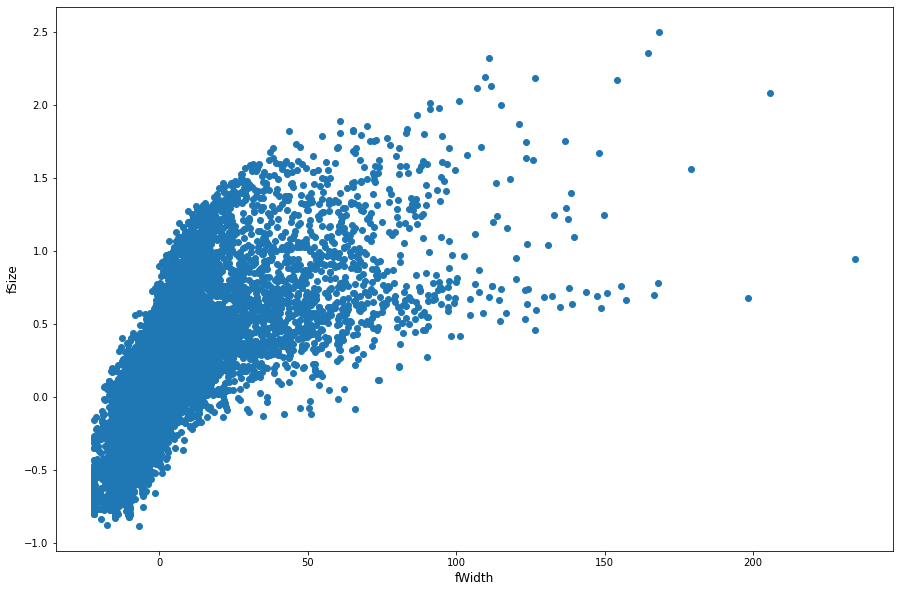

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(attribute1, attribute2)
ax.set_xlabel(df.columns[1], fontsize=12)
ax.set_ylabel(df.columns[2], fontsize=12)
ax.axis('tight')

In [20]:
((attribute1 / np.sqrt((attribute1 ** 2).sum())) * (attribute2 / np.sqrt((attribute2 ** 2).sum()))).sum()

0.7175168553176456

In [21]:
df.corr()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000


# Task 5

In [22]:
mean = df.iloc[:, 1].mean()
mean

22.180966219768596

In [23]:
variance = df.iloc[:, 1].var()
variance

336.5777816043198

In [24]:
from scipy.stats import norm

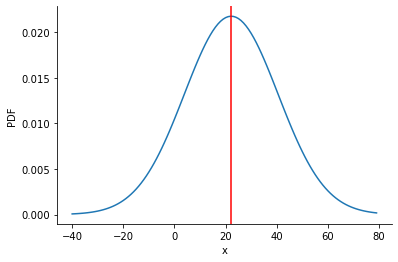

In [25]:
xaxis = np.arange(-40, 80, 1)
yaxis = norm.pdf(xaxis, mean, np.sqrt(variance))
plt.plot(xaxis, yaxis)
plt.xlabel('x')
plt.ylabel('PDF')
plt.axvline(mean, c='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Task 6

In [26]:
df.var().argmax()

9

In [27]:
df.var().max()

5584.839982703803

In [28]:
df.var().argmin()

4

In [29]:
df.var().min()

0.012212636673948844

# Task 7

In [30]:
cov_mat = s/n
cov_mat

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1794.686571,598.832056,14.063490,-4.886738,-2.800233,-924.385500,-258.713552,11.813387,-9.706307,1324.794475
fWidth,598.832056,336.560086,6.220775,-2.045029,-1.178164,-289.957100,-164.885064,15.185288,31.635030,461.761921
fSize,14.063490,6.220775,0.223338,-0.073507,-0.042241,-4.472843,2.293414,0.152113,-2.302804,15.434656
fConc,-4.886738,-2.045029,-0.073507,0.033419,0.019725,1.215131,-1.136468,-0.043000,1.122678,-4.485425
fConc1,-2.800233,-1.178164,-0.042241,0.019725,0.012212,0.655298,-0.669354,-0.025238,0.662872,-2.515662
fAsym,-924.385500,-289.957100,-4.472843,1.215131,0.655298,3505.173477,827.439241,3.147765,-86.061825,-914.642631
fM3Long,-258.713552,-164.885064,2.293414,-1.136468,-0.669354,827.439241,2600.875286,-18.265400,-247.972042,141.107736
fM3Trans,11.813387,15.185288,0.152113,-0.043000,-0.025238,3.147765,-18.265400,433.759406,2.532901,17.784263
fAlpha,-9.706307,31.635030,-2.302804,1.122678,0.662872,-86.061825,-247.972042,2.532901,681.363178,-430.230626
fDist,1324.794475,461.761921,15.434656,-4.485425,-2.515662,-914.642631,141.107736,17.784263,-430.230626,5584.546353


In [31]:
max_pair = (0, 1) 
max_cov = cov_mat.iloc[0, 1]

for i in range(d):
    for j in range(d):
        if i < j and cov_mat.iloc[i, j] > max_cov:
            max_cov = cov_mat.iloc[i, j]
            max_pair = i, j
            
print(max_pair)
print(max_cov)

(0, 9)
1324.7944745035559


In [32]:
min_pair = (0, 1) 
min_cov = cov_mat.iloc[0, 1]

for i in range(d):
    for j in range(d):
        if i < j and cov_mat.iloc[i, j] < min_cov:
            min_cov = cov_mat.iloc[i, j]
            min_pair = i, j
            
print(min_pair)
print(min_cov)

(0, 5)
-924.3854997097313
